## **Optymalizacja numeryczna**

---
### **Część II** - <font color='orange'>w jaki sposób to działa.

W tej części przedstawione zostaną graficznie rezultaty działania optymalizatorów. <br>
Wizualizacje mają na celu pogłębienie wiedzy o tym, czym jest proces poszukiwań optimum i jakie są własności metod numerycznych.<br>
Ta dodatkowa wiedza pozwoli bardziej efektywnie korzystać z metod bibliotecznych.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

**Ćwiczenie 1**: Zaimplementuj poniższą funkcję, a następnie kilkukrotnie uruchom kod. Od czego zależy znalezione minimum?

$$F(x) = \cos x - 3\exp\left[-(x-0.2)^2\right]$$

Zinterpretuj jakie informacje znajdują się na wykresie.

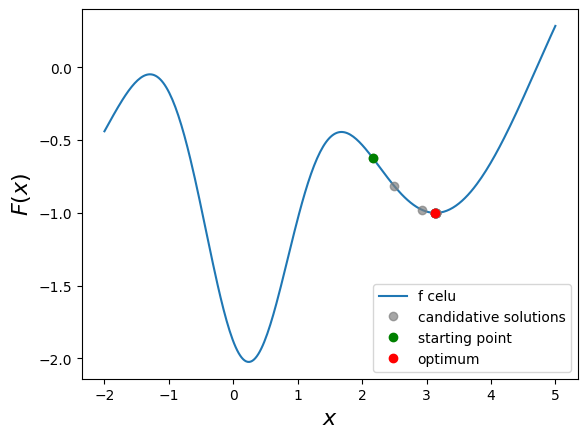

In [3]:
def Fcelu(x):
    return np.cos(x) - 3 * np.exp(-(x - 0.2)**2)

x_pocz = np.random.uniform(-1.0,4.0)
x_opt, x_historia = optimize.fmin(Fcelu, x_pocz, disp=False, retall=True)

x_historia_array = np.array([x[0] for x in x_historia])
xx = np.linspace(-2,5, 300)
plt.plot(xx,Fcelu(xx), label="f celu")
plt.plot(x_historia_array, Fcelu(x_historia_array), 'o', color='gray', alpha=0.7, label="candidative solutions")
plt.plot(x_pocz, Fcelu(x_pocz), 'go', label="starting point")
plt.plot(x_opt, Fcelu(x_opt), 'ro', label="optimum")
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$F(x)$', fontsize=16)
plt.legend()
plt.show()

**Odpowiedź 1:** od punktu początkowego

**Ćwiczenie 2**: Jaka jest rożnica między optymalizacją analityczną, a numeryczną?

**Odpowiedź 2:** analityczna polega na znajdowaniu dokładnego punktu, numeryczna na iteracjach i wyborze najlepszego kandydata

**Ćwiczenie 3**: Jak postępować z metodą numeryczną, by zwiększyć szanse znalezienia optimum globalnego?

**Odpowiedź 3:** stworzenie jednego punktu startowego na wszystkich obszarach gdzie funkcja maleje albo rosnie

**Ćwiczenie 4**: Dla podanej ponizej funkcji oraz jej wizualizacji zinterpretuj poniższy wykres "Wykres do analizy".



$$F(\mathbf{x})=\sin x + \sin (3x-0.3)$$

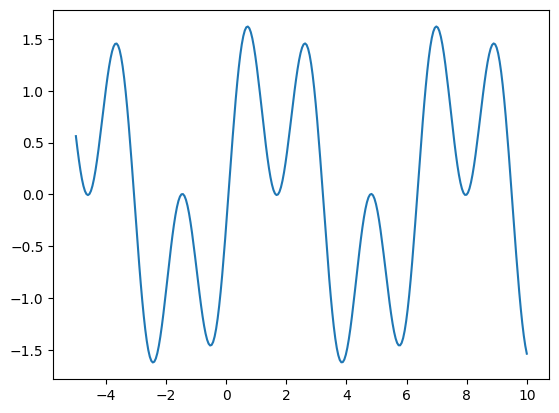

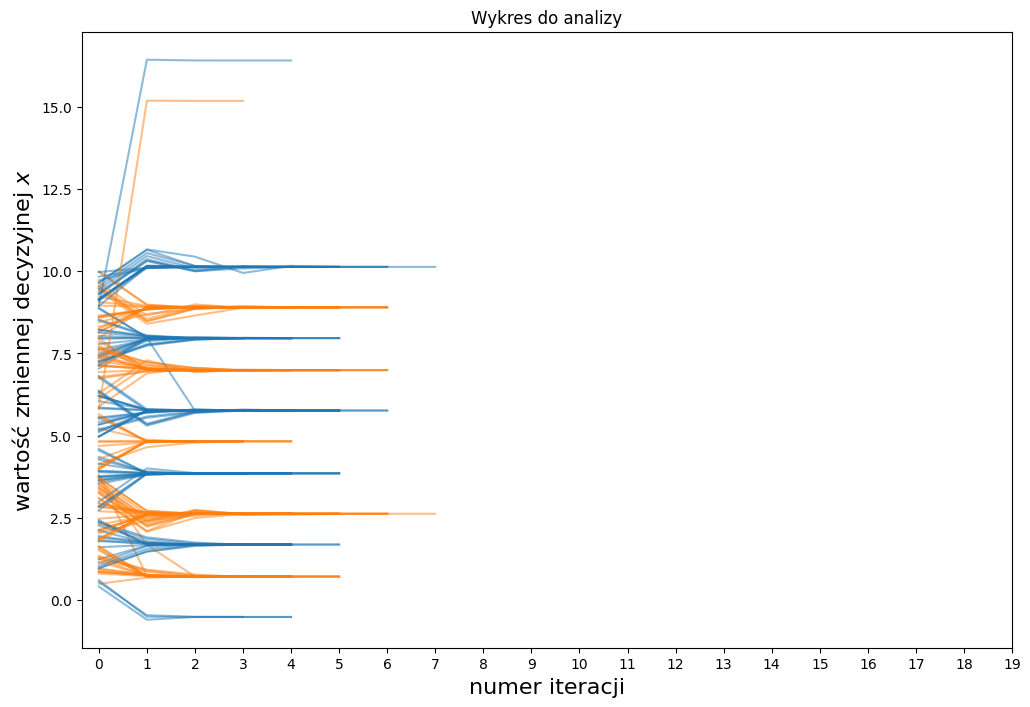

In [4]:
def Fcelu(x):
    return np.sin(x) + np.sin(3*x-0.3)

def negFcelu(x):
  return -Fcelu(x)

os_x = np.linspace(-5, 10, 300)
plt.plot(os_x, Fcelu(os_x))
plt.show()


plt.figure(figsize=(12,8))
for _ in range(100):
  x_opt, x_historia = optimize.fmin_bfgs(Fcelu, np.random.uniform(0,10), disp=False, retall=True)
  plt.plot(x_historia, color='tab:blue', alpha=0.5)
  x_opt, x_historia = optimize.fmin_bfgs(negFcelu, np.random.uniform(0,10), disp=False, retall=True)
  plt.plot(x_historia, color='tab:orange', alpha=0.5)

plt.xticks(np.arange(20))
plt.xlabel('numer iteracji', fontsize=16)
plt.ylabel(r'wartość zmiennej decyzyjnej $x$', fontsize=16)
plt.title("Wykres do analizy")
plt.show()

**Odpowiedź 4:** ten wykres pokazuje ile iteracji potzrybuje algorytm do tego momentu, kiedy zdecyduje sie na dokladna wartosc zmiennej decyzyjnej

**Ćwiczenie 5**: Zastąp procedurę `fmin` procedurą `fmin_bfgs`, a następnie zreferuj jak wpłynęło to na wyniki powyższej symulacji.

Opisz pokrótce (2-3 zdania) na czym polega algorytm BFGS.

**Odpowiedź 5:** bfgs potrzebuje mniej iteracji dla zdecydowania sie na wartosc zmiennej decyzyjnej

### Wizualizacja 3D

Wizualizacja rezultatów optymalizacji funkcji dwu zmiennych ($\mathbf{x}\in \Re^2$) wymaga poznania technik **rysowania wykresów funkcji dwuwymiarowych**.

Poniżej wprowadzenie poprzez przykłady.

In [5]:
os_x1 = np.arange(0,5)
os_x2 = np.arange(2,6)
print(os_x1)
print(os_x2)

[0 1 2 3 4]
[2 3 4 5]


In [6]:
siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)
print(siatka_X1, end='\n\n')
print(siatka_X2)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]

[[2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]


Wiesz już co robi `meshgrid` i dlaczego nazwałem wyniki `siatka_`?

In [7]:
def F(x):
  x1, x2 = x
  return x1 + x2 

macierz_Z = F([siatka_X1, siatka_X2])
macierz_Z

array([[2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8],
       [5, 6, 7, 8, 9]])

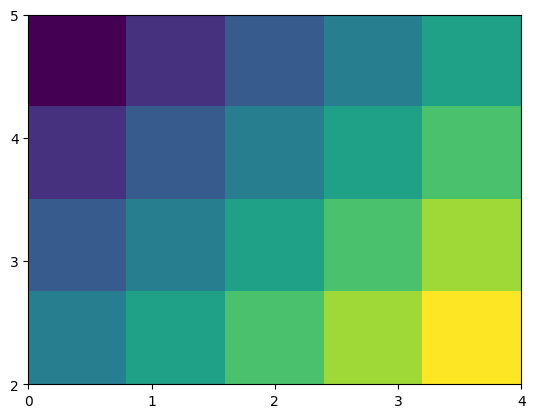

In [8]:
plt.imshow(macierz_Z, extent=[os_x1.min(), os_x1.max(), os_x2.min(), os_x2.max()])
plt.xticks(os_x1)
plt.yticks(os_x2)
plt.show()

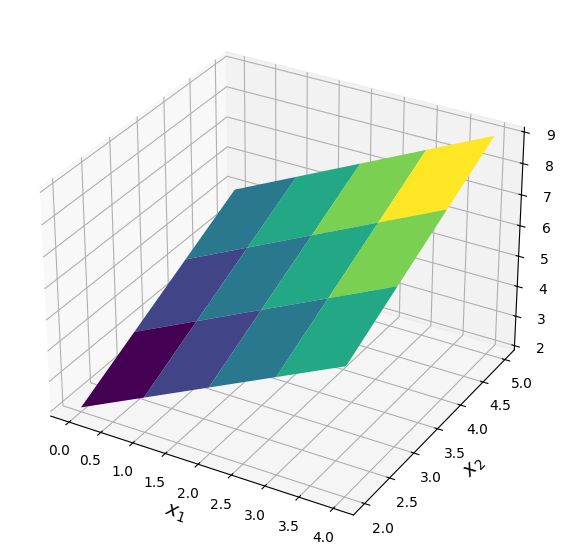

In [9]:
fig, ax = plt.subplots(figsize=(7,7), subplot_kw={'projection':'3d'})
ax.plot_surface(siatka_X1, siatka_X2, macierz_Z, cmap='viridis')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$F$', fontsize=14)
plt.show()

Oto funkcja opakowująca wszystkie rutynowe czynności przy rysowaniu wykresu trójwymiarowego. 

In [10]:
def pokaz_3D(Fcelu, zakres):
  os_x1 = np.linspace(zakres[0], zakres[1], 50)
  os_x2 = np.linspace(zakres[2], zakres[3], 50)
  siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)

  fig, ax = plt.subplots(figsize=(7,7), subplot_kw={'projection':'3d'})
  ax.plot_surface(siatka_X1, siatka_X2, Fcelu([siatka_X1, siatka_X2]), cmap='Spectral_r')
  ax.set_xlabel('$x_1$', fontsize=14)
  ax.set_ylabel('$x_2$', fontsize=14)
  ax.set_zlabel('$F$', fontsize=14)
  plt.show()


A tak się z niej korzysta.

$$F(\mathbf{x})=3(x_1-2)^2 \cdot (x_2+1)^2$$

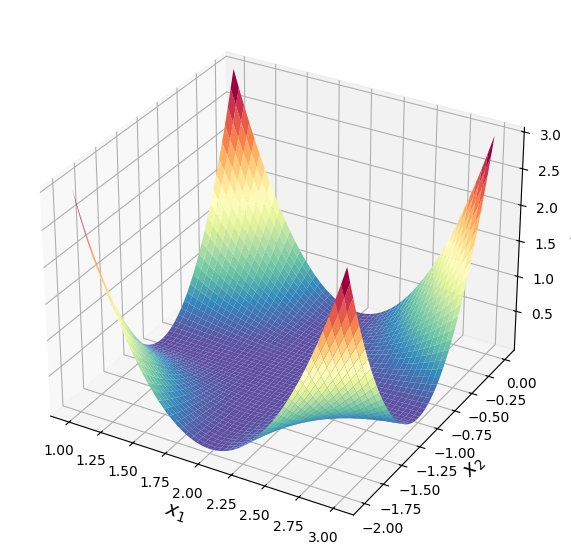

In [11]:
def Fcelu(x):
  x1, x2 = x
  return 3*(x1-2)**2 * (x2+1)**2

pokaz_3D(Fcelu, zakres=[1,3, -2,0])

A oto analogiczna funkcja rysująca na płaszczyźnie, ale za to pokazująca całą historię poszukiwań rozwiązania optymalnego. 

In [12]:
def pokaz_2D(Fcelu, x_historia, zakres):
  x_pocz, x_opt = x_historia[0], x_historia[-1]
  os_x1 = np.linspace(zakres[0], zakres[1], num=100)
  os_x2 = np.linspace(zakres[2], zakres[3], num=100)
  siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)
  macierz_Z = Fcelu([siatka_X1, siatka_X2])

  fig, ax = plt.subplots(figsize=(8,8))
  cplot = ax.contourf(siatka_X1, siatka_X2, macierz_Z, 10, cmap='Spectral_r', alpha=1)
  clines = ax.contour(siatka_X1, siatka_X2, macierz_Z, 10, colors='black')
  for punkt in x_historia:
      ax.plot(punkt[0], punkt[1], 'o', 
              color='white', markeredgecolor='black', markersize=5, alpha=0.7)
  ax.plot(x_pocz[0], x_pocz[1], 'd', 
          color='gray', markeredgecolor='black', markersize=10, alpha=0.7)    
  ax.plot(x_opt[0], x_opt[1], 'h', 
          color='white', markeredgecolor='black', markersize=15)
  ax.set_aspect('equal')
  ax.set_xlabel(r'$x_1$', fontsize=16)
  ax.set_ylabel(r'$x_2$', fontsize=16)
  ax.clabel(clines)
  fig.colorbar(cplot)
  return fig, ax

Tak się z niej korzysta.

$$F(\mathbf{x}) = (x_1 - 1)^2 + (x_2 + 2)^2$$

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 97


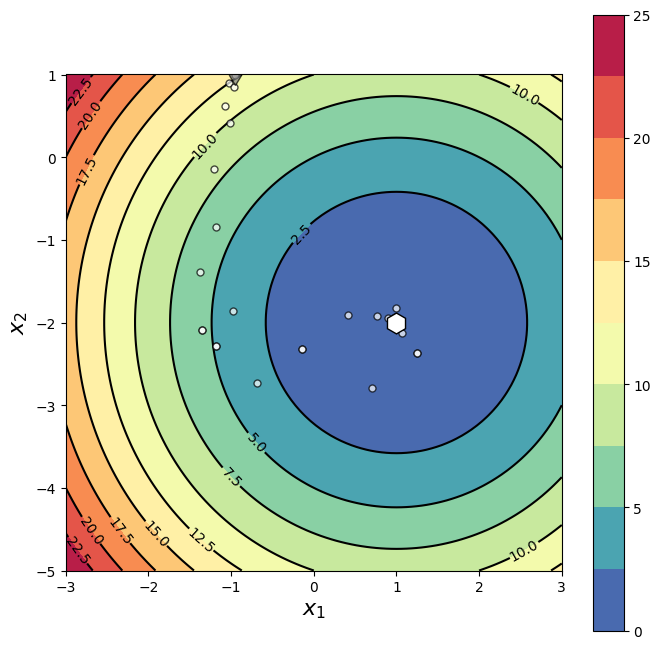

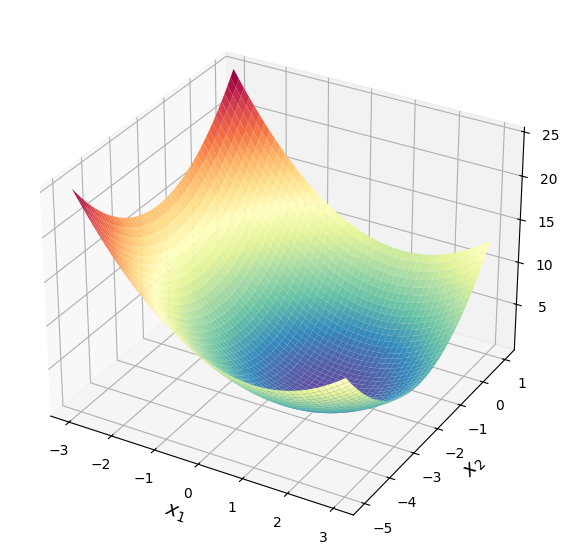

In [13]:
def Fcelu(x):
  x1, x2 = x
  return (x1 - 1)**2 + (x2 + 2)**2

x_opt, x_historia = optimize.fmin(
  Fcelu,
  np.random.uniform(-1,1, size=2),
  retall=True,
)

zakres=[-3, 3, -5, 1]
pokaz_2D(Fcelu, x_historia, zakres)
plt.show()
pokaz_3D(Fcelu, zakres)

Funkcja Rosenbrocka:
$$F(\mathbf{x}) = (1-x_1)^2 + 100(x_2 - x_1^2)^2$$



Poczytaj więcej na temat tego dlaczego funkcja Rosenbrocka jest dla nas tak istotna: 
1) https://www.sfu.ca/~ssurjano/rosen.html,
2) https://mathworld.wolfram.com/RosenbrockFunction.html.


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 87
         Function evaluations: 167


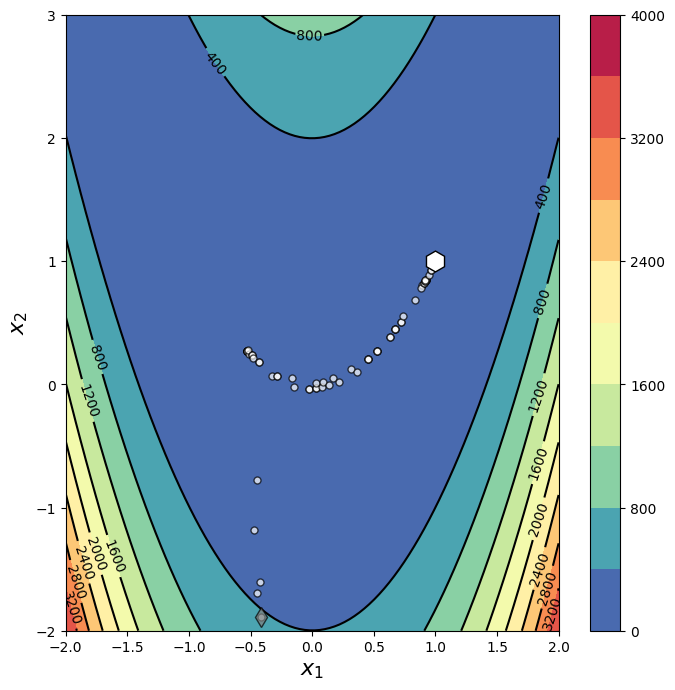

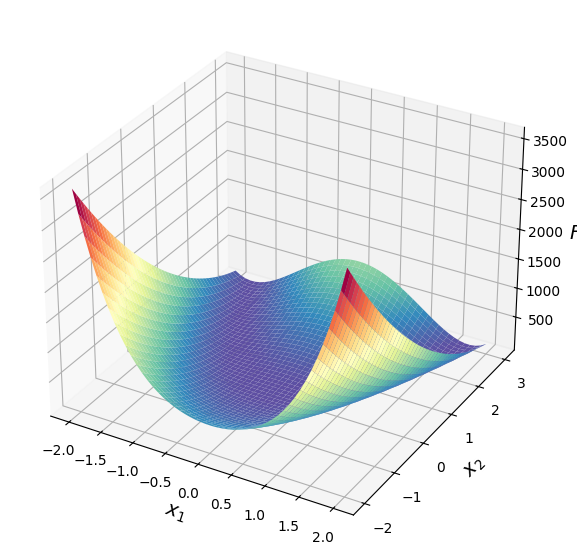

In [14]:
def Fcelu(x):
    x1, x2 = x
    return (1-x1)**2 + 100*(x2-x1**2)**2

# każda zmienna decyzyjna jest losowana z innego zakresu
x_pocz = (np.random.uniform(-1,2), np.random.uniform(-2,1))
x_opt, x_historia = optimize.fmin(Fcelu, x_pocz, retall=True)

zakres=[-2, 2, -2, 3]
pokaz_2D(Fcelu, x_historia, zakres)
plt.show()
pokaz_3D(Fcelu, zakres)

**Ćwiczenie 6**: Zaimplementuj poniższą funkcję, a następnie uruchom poniższą komórkę kodu.

$$F(\mathbf{x}) = \left(\exp\left[-x_1-1\right]\right)^2 + (x_2+2)^2 - x_1x_2 + 10\left(\sin 4x_1 + \cos 5x_2\right)$$

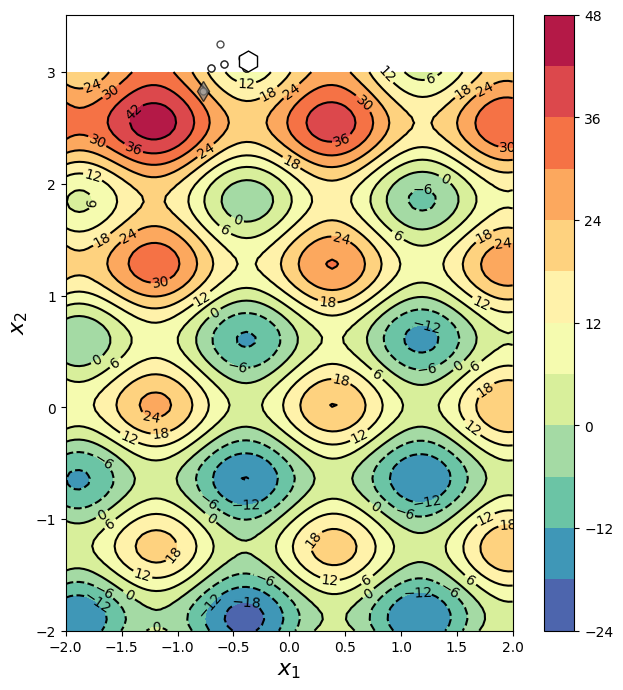

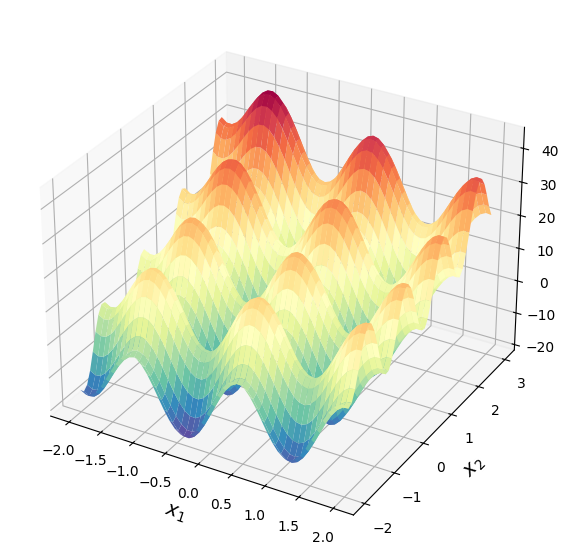

In [15]:
def Fcelu(x):
  x1, x2 = x
  return (np.exp(-x1 - 1)**2 + (x2 + 2)**2 - x1*x2 + 10 * (np.sin(4*x1) + np.cos(5*x2)))

x_pocz = (np.random.uniform(-2,2), np.random.uniform(-2,3))
x_opt, x_historia = optimize.fmin(Fcelu, x_pocz, retall=True, disp=False)

zakres=[-2, 2, -2, 3]
pokaz_2D(Fcelu, x_historia, zakres)
plt.show()
pokaz_3D(Fcelu, zakres)

**Wizualizacja uwzględniająca ograniczenia**

In [16]:
def pokaz2D_z_ogr(Fcelu, x_pocz, x_opt, zakres, ograniczenia, gx=None):
  fig, ax = pokaz_2D(Fcelu, x_historia=[x_pocz, x_opt], zakres=zakres)

  if 'fun' in ograniczenia:
    os_x1 = np.linspace(zakres[0], zakres[1], num=100)
    krzywa_g_x1 = gx(os_x1)
    ax.plot(os_x1, krzywa_g_x1, color='black')
    ax.fill_between(os_x1, krzywa_g_x1, color='grey', alpha=0.7)
    ax.set_ylim(*zakres[2:])
  else:
    obszar_dopuszczalny = plt.Rectangle((ograniczenia['x1'][0], ograniczenia['x2'][0]),
                                        ograniczenia['x1'][1]-ograniczenia['x1'][0],
                                        ograniczenia['x2'][1]-ograniczenia['x2'][0],
                                        facecolor='gray', edgecolor='black', alpha=0.7)
    ax.add_patch(obszar_dopuszczalny)
  ax.plot(x_pocz[0], x_pocz[1], 'd', 
          color='gray', markeredgecolor='black', markersize=10, alpha=0.7) 
  return fig, ax

Znajdźmy maksimum poniższej funkcji celu:
$$F(\mathbf{x}) = \left(4\sin\pi x_1 + 6\sin\pi x_2\right) + (x_1-1)^2 + (x_2-1)^2$$

i ograniczeń:
$$3.5 \leq x_1 \leq 6$$
$$-5 \leq x_2 \leq -2$$


i zwizualizujmy rozwiązanie wraz z ograniczeniami.

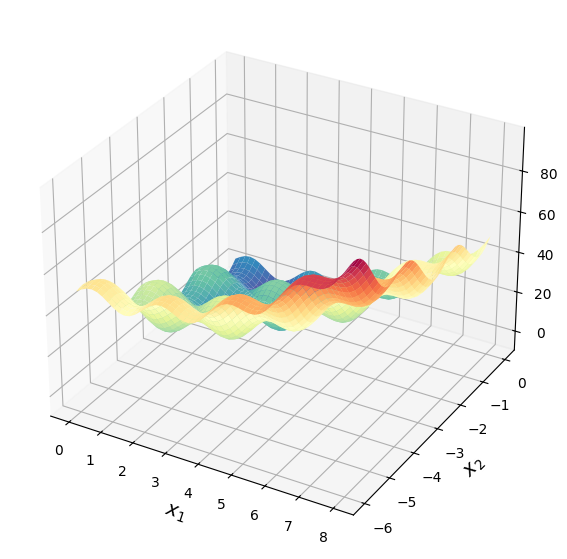

(<Figure size 800x800 with 2 Axes>, <Axes: xlabel='$x_1$', ylabel='$x_2$'>)

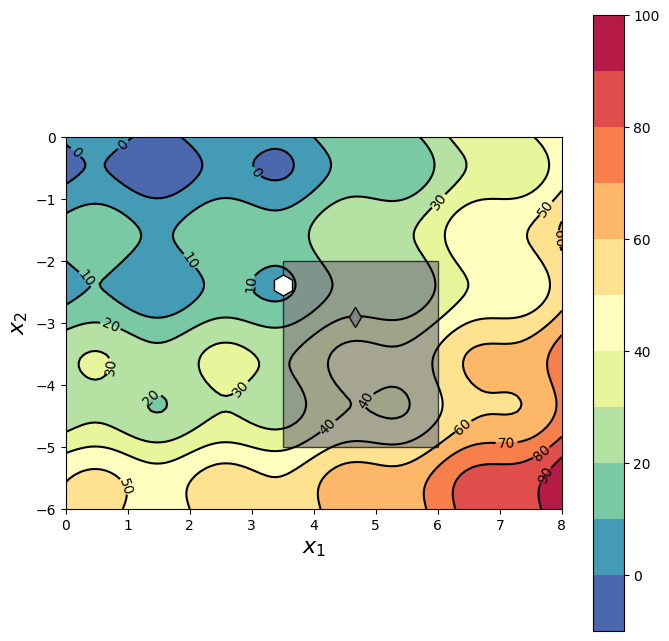

In [17]:
def Fcelu(x):
    x1, x2 = x
    return (
        4 * np.sin(np.pi * x1) +
        6 * np.sin(np.pi * x2) +
        (x1 - 1) ** 2 +
        (x2 - 1) ** 2
    )

ograniczenia = {'x1': [3.5, 6], 'x2': [-5,-2]}
x_pocz = (
    np.random.uniform(*ograniczenia['x1']), 
    np.random.uniform(*ograniczenia['x2'])
)
x_opt = optimize.minimize(
    Fcelu, x_pocz, method='TNC', bounds=list(ograniczenia.values())
).x
zakres = [0, 8, -6, 0]

pokaz_3D(Fcelu, zakres)
pokaz2D_z_ogr(Fcelu, x_pocz, x_opt, zakres, ograniczenia)

**Ćwiczenie 7**: Zminimalizuj funkcję celu
$$F(\mathbf{x}) = (x_1-1)^2 + (x_2+2)^2 + x_1x_2$$
wraz z zadanymi ograniczeniami: 
$$3.5 \leq x_1 \leq 6$$
$$-5 \leq x_2 \leq -2$$

Następnie zwizualizuj przebieg optymalizacji z użyciem `pokaz2D_z_ogr`.

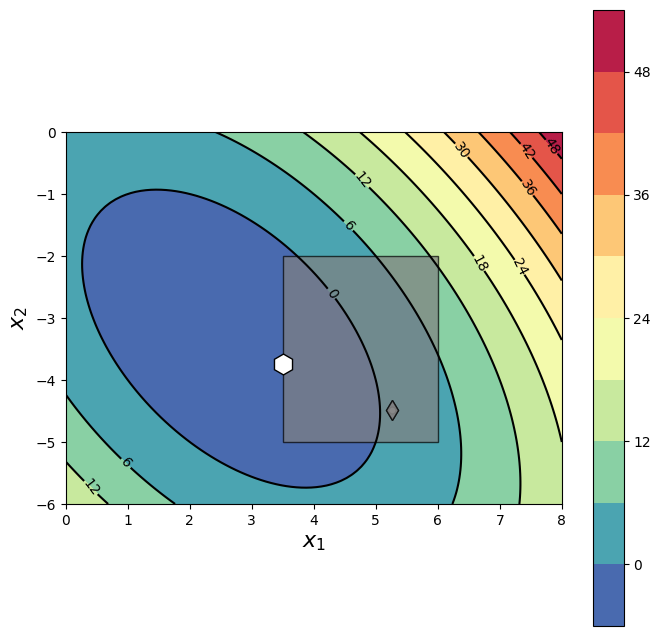

In [18]:
def Fcelu(x):
  x1, x2 = x
  return (x1 - 1)**2 + (x2 + 2)**2 + x1 * x2

ograniczenia = {'x1': [3.5, 6], 'x2': [-5,-2]}
x_pocz = (
  np.random.uniform(*ograniczenia['x1']),
  np.random.uniform(*ograniczenia['x2'])
)
x_opt = optimize.minimize(Fcelu, x_pocz, method='TNC', bounds=list(ograniczenia.values())).x

zakres = [0, 8, -6, 0]
pokaz2D_z_ogr(Fcelu, x_pocz, x_opt, zakres, ograniczenia)
plt.show()

Funkcja celu: 
$$F(\mathbf{x}) = (x_1-1)^2 + (x_2+2)^2 + x_1x_2$$
Ograniczenia: 
$$g(\mathbf{x}) = x_2 + 2 + 2(x_1-3)^2 - (x_1 - 3)^4 \geq 0$$

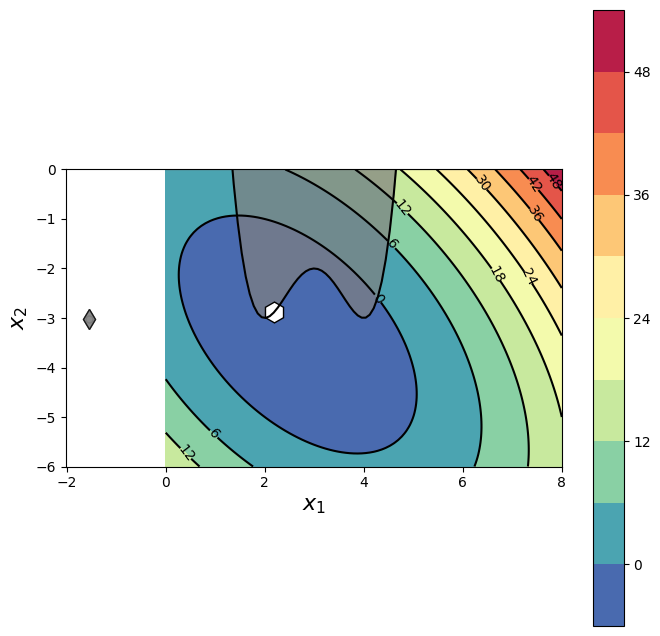

In [19]:
def g(x):
  x1, x2 = x
  return x2 + 2 + 2*(x1-3)**2 - (x1-3)**4

# w celu narysowania krzywej g(x)=0 trzeba zdefiniować osobną funkcję
# można wyznaczyć jej postać automatycznie biblioteką SymPy, jeżeli włożyć w to trochę wysiłku
gx = lambda x1: -2 -2*(x1-3)**2 + (x1-3)**4

ograniczenia = {'type': 'ineq', 'fun': g}

x_pocz = np.random.uniform(-5,5, size=2)
x_opt = optimize.minimize(Fcelu, x_pocz, method='SLSQP', constraints=ograniczenia).x

zakres = [0, 8, -6, 0]
pokaz2D_z_ogr(Fcelu, x_pocz, x_opt, zakres, ograniczenia, gx)
plt.show()

### Forma kwadratowa

W celu lepszego zrozumienia działania procedur optymalizacji i uczenia maszynowego warto zaprzyjaźnić się z formą kwadratową:

$$ \mathbf{x}^{\text{T}} A \mathbf{x},$$

przy czym do wizualizacji wystarczy rozważyć jej dwuwymiarowe wcielenie: $\mathbf{x} \in \Re^2$, $A \in \Re^{2 \times 2}$. <br>

Skorzystaj z kodu poniżej, by oswoić się z wykresami formy kwadratowej dla różnych wartości współrzędnych macierzy $\mathbf{A}$. 
Poniższa implementacja oblicza formę kwadratową w standardowy sposób z użyciem macierzy.

In [20]:
def quadratic_form_matrix(
  mesh_X1: np.ndarray, mesh_X2: np.ndarray, A: np.ndarray, meshgrid_shape: bool = True, debug:bool = False,
) -> np.ndarray:
  """
  Computes quadratic form function q (characterised by matrix A) for matrix x.

  TLDR: it computes this equation: q(x) = x'@A@x
  Here is more info: https://duch.mimuw.edu.pl/~m_korch/pl/17-quadratic-form/

  :param mesh_X1: array of vectors of shape [1, n_vects]
  :param mesh_X2: array of vectors of shape [1, n_vects]
  :param A: form matrix of shape [n_dims, n_dims]
  :return: q(x), a matrix of shape [n_vects] converted (if selected) to numpy 
    meshgrid shape, i.e. [n_dims * sqrt(n_vects)]
  """
  x = np.vstack((mesh_X1.ravel(), mesh_X2.ravel()))
  if debug:
    print(f"Shape of x: {x.shape}")
    print(f"Shape of A: {A.shape}")

  z = (x.transpose()@A@x).diagonal()
  if debug:
    print(f"Shape of initial z: {z.shape}")

  if meshgrid_shape:
    n_dims = x.shape[0]
    n_vects = x.shape[1]
    new_shape=[int(n_vects ** (1 / n_dims)) for _ in range(n_dims)]
    z = np.reshape(z, newshape=new_shape)
  else:
    z = z[:, np.newaxis]

  if debug:
    print(f"Shape of final z: {z.shape}")
  return z

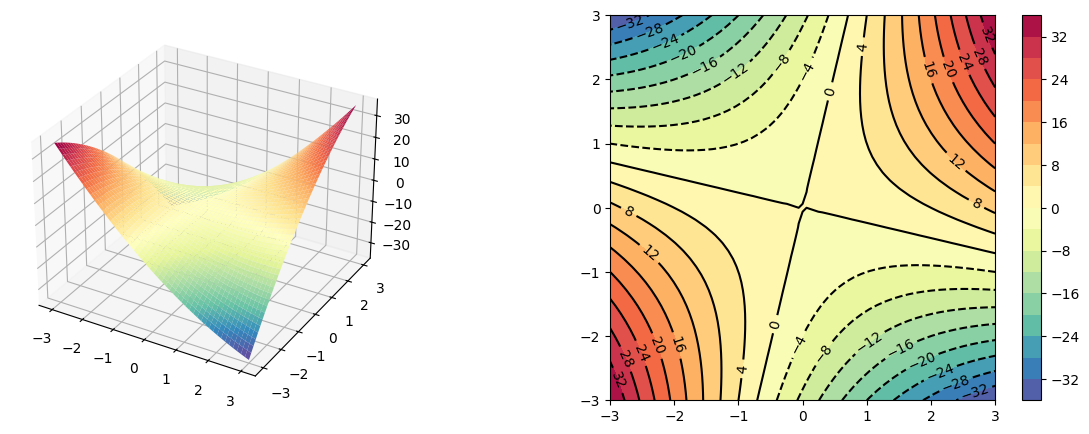

In [21]:
rozdzielczosc = 50

os_x1 = np.linspace(start=-3, stop=3, num=rozdzielczosc)
os_x2 = np.linspace(start=-3, stop=3, num=rozdzielczosc)
siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)

# ================================
A = np.array([[1,2], [2,-1]])
# ================================

macierz_Z = quadratic_form_matrix(siatka_X1, siatka_X2, A)


cmap = 'Spectral_r'
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(
  siatka_X1,
  siatka_X2,
  macierz_Z,
  rcount=rozdzielczosc,
  ccount=rozdzielczosc,
  cmap=cmap
) 

rozdzielczosc_konturu = 20
ax = fig.add_subplot(1, 2, 2)
c_1 = ax.contourf(
  siatka_X1, siatka_X2, macierz_Z, rozdzielczosc_konturu, cmap=cmap
)
c_2 = ax.contour(
  siatka_X1, siatka_X2, macierz_Z, rozdzielczosc_konturu, colors='black'
)

ax.set_aspect('equal')
fig.colorbar(c_1, ax=ax)
plt.clabel(c_2, inline=True, fontsize=10)

plt.show()

**Ćwiczenie 8**: Zaimplementuj, a następnie zwizualizuj formę kwadratową w uproszczonej (nie-macierzowej) postaci. Do rozwiązania zadania będziesz potrzebować przekształcić (rozpisać) wzór z powyższej komórki.

In [22]:
def quadratic_form_non_matrix(mesh_X1: np.ndarray, mesh_X2: np.ndarray, A: np.ndarray) -> np.ndarray:
  """
  Computes quadratic form function q (characterised by matrix A) for matrix x.

  TLDR: it computes this equation: q(x) = x'@A@x but in non-matrix way.

  :param mesh_X1: array of vectors of shape [1, n_vects]
  :param mesh_X2: array of vectors of shape [1, n_vects]
  :param A: form matrix of shape [n_dims, n_dims]
  :return: q(x), a meshgrid matrix that contains values of quadratic form
    computed over input matrix x
  """
  ...

In [24]:
assert np.isclose(
    quadratic_form_matrix(siatka_X1, siatka_X2, A),
    quadratic_form_non_matrix(siatka_X1, siatka_X2, A)
).all()

AssertionError: 